# POSTTEST 8 KB
## Rivan Abdillah (2009106025)

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers,optimizers,datasets
import matplotlib.pyplot as plt
import numpy as np
import tensorflow_datasets as tfds

C:\Users\Acer Gk\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Dataset yang saya gunakan adalah horses or human

In [2]:
ds, info = tfds.load('horses_or_humans', split='train+test', shuffle_files=True, with_info=True,as_supervised=True)

### Load Info Dataset

In [3]:
print("Nama Dataset : ", info.name)
print("Image Feature : ", info.features["image"])
print("Jumlah Data Train : ", info.splits["train"].num_examples)
print("Jumlah Data Test : ", info.splits["test"].num_examples)

Nama Dataset :  horses_or_humans
Image Feature :  Image(shape=(300, 300, 3), dtype=tf.uint8)
Jumlah Data Train :  1027
Jumlah Data Test :  256


### Visualisasi Dataset Yang Digunakan

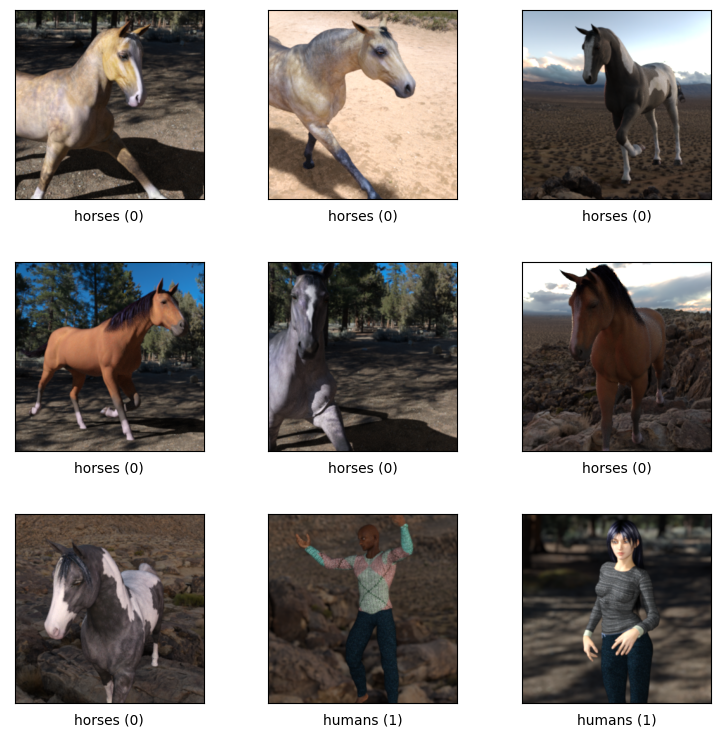

In [4]:
vis = tfds.visualization.show_examples(ds, info)

#### Resize Shape dan Normalisasi

In [5]:
def resize(image, label):
    image = tf.image.resize(image, [210,210])
    return(image, label)

ds = ds.map(resize)

ds = ds.map(lambda x,y : (x/255,y))

ds = ds.batch(32)

#### One Hot Encoding

In [6]:
def one_hot(image, label) :
    label = tf.one_hot(tf.cast(label, tf.int32),3)
    label = tf.cast(label, tf.float32)
    return image, label
ds = ds.map(one_hot)

### Buat Model Sequential

In [7]:
model = tf.keras.Sequential()

In [8]:
#input layer
model.add(tf.keras.layers.Conv2D(32,(5,5),activation='relu',input_shape=(210,210,3)))

#hidden layer
model.add(tf.keras.layers.MaxPool2D())
model.add(tf.keras.layers.Conv2D(16,(3,3),activation='relu'))
model.add(tf.keras.layers.MaxPool2D(4,4))
model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(256, activation='relu'))

#output
model.add(tf.keras.layers.Dense(3, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 206, 206, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 103, 103, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 101, 101, 16)      4624      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 25, 25, 16)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 10000)             0         
                                                                 
 dense (Dense)               (None, 256)               2

In [9]:
model.compile("adam", "categorical_crossentropy", ["accuracy"])


In [10]:
history = model.fit(ds, epochs=10,batch_size=32)

Epoch 1/10
41/41 [==============================] - 43s 993ms/step - loss: 0.4793 - accuracy: 0.8012
Epoch 2/10
41/41 [==============================] - 41s 976ms/step - loss: 0.2012 - accuracy: 0.9392
Epoch 3/10
41/41 [==============================] - 37s 894ms/step - loss: 0.1093 - accuracy: 0.9610
Epoch 4/10
41/41 [==============================] - 37s 900ms/step - loss: 0.0513 - accuracy: 0.9883
Epoch 5/10
41/41 [==============================] - 37s 899ms/step - loss: 0.0174 - accuracy: 0.9953
Epoch 6/10
41/41 [==============================] - 37s 884ms/step - loss: 0.0056 - accuracy: 1.0000
Epoch 7/10
41/41 [==============================] - 37s 884ms/step - loss: 0.0027 - accuracy: 1.0000
Epoch 8/10
41/41 [==============================] - 38s 928ms/step - loss: 0.0034 - accuracy: 1.0000
Epoch 9/10
41/41 [==============================] - 38s 910ms/step - loss: 0.0072 - accuracy: 0.9992
Epoch 10/10
41/41 [==============================] - 37s 885ms/step - loss: 0.0032 - accura

### Evaluate Model

In [13]:
eva = model.evaluate(ds,verbose=1)
print(f'Test Loss : {eva[0]}')
print(f'Test Akurasi : {round(eva[1] * 100,2)} %')

41/41 [==============================] - 8s 202ms/step - loss: 0.0022 - accuracy: 1.0000
Test Loss : 0.0021574492566287518
Test Akurasi : 100.0 %


### Predict Model

In [14]:
predictions = model.predict(ds)

41/41 [==============================] - 9s 209ms/step
